## Convolutional Neural Networks (CNNs)

In [2]:
# Convolutional layers    N images -> C images, filter window size KxK
# Maxpooling operations   Reduce feature map dimensions by picking max value within local, non-overlapping slides size LxL
# Fully connected layers  N output units connected to each of the M input units
# PyTorch : Python package for replacing NumPy with GPUs or deep learning

In [3]:
import numpy as np
import torch

## Tensors

In [4]:
# Values randomly initialized between 0-1
x = torch.Tensor(5, 3)
print(x)
print(x.type)
# The type is Tensor object

tensor([[1.3556e-19, 1.3563e-19, 1.3563e-19],
        [1.8561e-19, 1.4584e-19, 7.8454e+17],
        [1.3556e-19, 1.3563e-19, 1.3563e-19],
        [1.8561e-19, 1.4584e-19, 7.8456e+17],
        [1.3556e-19, 1.3563e-19, 1.3563e-19]])
<built-in method type of Tensor object at 0x7f167bc766c0>


In [5]:
# Random numbers within range 0-1
y = torch.rand(5, 3)
print(y)
print(y.type)
# The type is Tensor object

# Random numbers within range 0-1 with mean 0 std 1
y = torch.randn(5, 3)
print(y)

tensor([[0.8826, 0.3274, 0.4059],
        [0.7696, 0.6767, 0.7296],
        [0.0667, 0.4313, 0.5174],
        [0.7244, 0.4422, 0.3365],
        [0.7302, 0.7722, 0.6827]])
<built-in method type of Tensor object at 0x7f167bc6e1b0>
tensor([[ 1.5571,  1.8023, -0.6375],
        [-1.4384,  1.4147, -1.4743],
        [-2.3142, -0.9183, -1.3612],
        [ 0.6927,  1.1305, -0.2529],
        [-2.3846, -0.4954,  0.6530]])


In [6]:
x = x.double()
y = y.double()
print(x)
print(y)
# The type is torch.float64

tensor([[1.3556e-19, 1.3563e-19, 1.3563e-19],
        [1.8561e-19, 1.4584e-19, 7.8454e+17],
        [1.3556e-19, 1.3563e-19, 1.3563e-19],
        [1.8561e-19, 1.4584e-19, 7.8456e+17],
        [1.3556e-19, 1.3563e-19, 1.3563e-19]], dtype=torch.float64)
tensor([[ 1.5571,  1.8023, -0.6375],
        [-1.4384,  1.4147, -1.4743],
        [-2.3142, -0.9183, -1.3612],
        [ 0.6927,  1.1305, -0.2529],
        [-2.3846, -0.4954,  0.6530]], dtype=torch.float64)


In [7]:
x = torch.Tensor([[-0.1859,  1.3970,  0.5236],
                  [ 2.3854,  0.0707,  2.1970],
                  [-0.3587,  1.2359,  1.8951],
                  [-0.1189, -0.1376,  0.4647],
                  [-1.8968,  2.0164,  0.1092]])
y = torch.Tensor([[ 0.4838,  0.5822,  0.2755],
                  [ 1.0982,  0.4932, -0.6680],
                  [ 0.7915,  0.6580, -0.5819],
                  [ 0.3825, -1.1822,  1.5217],
                  [ 0.6042, -0.2280,  1.3210]])
print(x.shape)
print(y.shape)

torch.Size([5, 3])
torch.Size([5, 3])


In [8]:
z = torch.stack((x, y))   # stack entire matrices
print(z.shape)
z1 = torch.cat((x, y), 0) # stack alone columns
print(z1.shape)
z2 = torch.cat((x, y), 1) # stack along rows
print(z2.shape)

torch.Size([2, 5, 3])
torch.Size([10, 3])
torch.Size([5, 6])


In [9]:
print(y[4,2])
print(z[1,4,2])

tensor(1.3210)
tensor(1.3210)


In [10]:
print(z[:,4,2]) # There are two elements

tensor([0.1092, 1.3210])


In [11]:
# 3 ways to sum x and y
print(x + y)
print(torch.add(x, y))
print(x.add(y))
torch.add(x, y, out=x)
print(x)

tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])


In [12]:
# Reshape a tensor
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1 is unsure of number of rows
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
x = torch.randn(10, 10)
y = torch.randn(2, 100)
x = x.view(1, 100)
y = y.view(100, 2)
z = torch.mm(x, y)
print(z)
print(z.shape)

tensor([[-16.0412,  -3.1227]])
torch.Size([1, 2])


## NumPy and PyTorch

In [14]:
a = torch.ones(5) # type tensor([])
print(a)
print(a.type)
b = a.numpy()     # type []
print(b)
print(b.dtype)

tensor([1., 1., 1., 1., 1.])
<built-in method type of Tensor object at 0x7f167bc8cab0>
[1. 1. 1. 1. 1.]
float32


In [15]:
# Tensor and numpy array share same memory location
a[0] += 1
print(a)
print(b)

tensor([2., 1., 1., 1., 1.])
[2. 1. 1. 1. 1.]


In [16]:
# 3 ways to add 1 to first index
a.add_(1)
print(a)
a[:] += 1
print(a)
a = a.add(1)
print(a)

tensor([3., 2., 2., 2., 2.])
tensor([4., 3., 3., 3., 3.])
tensor([5., 4., 4., 4., 4.])


In [17]:
# Convert NumPy array to tensor
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [18]:
# Move tensor onto GPU device's memory .to('cuda') or .cuda()
# Move tensor back to CPU device .to('cpu') or .cpu()
# or allocate tensor directly to GPU using device optional argument
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
x = torch.randn(5, 3).to(device)
y = torch.randn(5, 3, device=device)
z = x + y

cuda


In [19]:
print(z.cpu().numpy())
print(z.numpy)

[[-1.6564677  -1.0184641  -0.02946806]
 [-0.5212628   0.16838968 -2.1205254 ]
 [-1.0580049  -0.46218944 -3.1883717 ]
 [-1.7098668  -0.27525604  1.6873641 ]
 [-0.45054054 -0.46416646 -0.03061628]]
<built-in method numpy of Tensor object at 0x7f167bc8ca20>


## Autograd: Automatic Differentiation

In [20]:
# requires_grad is set to False by default setting it True tracks all operations where the tensor is 
# involved when computation complete, call .backward() to have all gradients computed automatically for 
# all these tensors. Gradients for these tensors accumulated into .grad attribute
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y) 
print(x.grad)
print(y.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None
None


In [21]:
z = y * y * 3 
# = 3*(x+2)^2 
# = (3*(x1+2)^2 + 3*(x2+2)^2 + 3*(x3+2)^2 + 3*(x4+2)^2) / 4
# df/dx1 = 3*2(x1+2)/4 = ((6*x1)+12) / 4
# x1 = 1
# df/dx1 = (6+12)/4 = 18/4 = 4.5
f = z.mean()
print(z,f)

b = x1
a = x1*x2*b
f = a+b

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


NameError: name 'x1' is not defined

In [ ]:
f.backward()

In [ ]:
print(f.grad_fn)
print(f)

## MNIST Data Preparation

In [58]:
import MNISTtools

# Images stacked in columns
# Vector of corresponding labels from 0 to 9
xtrain, ltrain = MNISTtools.load("training", path="./mnist/")
xtest, ltest = MNISTtools.load("testing", path="./mnist/")

In [59]:
def normalize_MNIST_images(x):
    x = ((x-255.0/2)/(255.0/2))
    x = x.astype(np.float32)
    return x

print(np.min(xtrain))
print(np.max(xtrain))
xtrain = normalize_MNIST_images(xtrain)
xtest = normalize_MNIST_images(xtest)

0
255


In [60]:
xtrain = xtrain.reshape(28, 28, 1, 60000)
xtest = xtest.reshape(28, 28, 1, 10000)
print(xtrain.shape)
print(xtest.shape)
xtrain = np.moveaxis(xtrain, -1, 0)
xtrain = np.moveaxis(xtrain, -1, 1)
xtest = np.moveaxis(xtest, -1, 0)
xtest = np.moveaxis(xtest, -1, 1)
print(xtrain.shape)
print(xtest.shape)

(28, 28, 1, 60000)
(28, 28, 1, 10000)
(60000, 1, 28, 28)
(10000, 1, 28, 28)


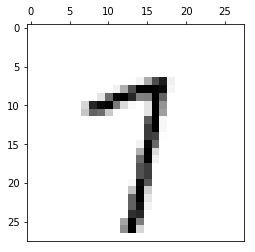

In [61]:
# Check data is well organized by displaying digit that corresponds to ltrain[42].
MNISTtools.show(xtrain[42, 0, :, :])

In [62]:
xtrain = torch.from_numpy(xtrain)
ltrain = torch.from_numpy(ltrain)
xtest = torch.from_numpy(xtest)
ltest = torch.from_numpy(ltest)

## Convolutional Neural Network (CNN) for MNIST Classification

In [63]:
import torch.nn as nn
import torch.nn.functional as F

# This is our neural networks class that inherits from nn.Module
class LeNet(nn.Module):

    # Here we define our network structure
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)   # 4*4*16
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # Here we define one forward pass through the network
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    # Determine the number of features in a batch of tensors
    def num_flat_features(self, x ):
        size = x.size()[1:]
        return np.prod(size)

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [64]:
# Return learnable parameters of the model
net.parameters()

<generator object Module.parameters at 0x7f16701ef6d8>

In [65]:
for name, param in net.named_parameters():
    print(name, param.size(), param.requires_grad)

conv1.weight torch.Size([6, 1, 5, 5]) True
conv1.bias torch.Size([6]) True
conv2.weight torch.Size([16, 6, 5, 5]) True
conv2.bias torch.Size([16]) True
fc1.weight torch.Size([120, 256]) True
fc1.bias torch.Size([120]) True
fc2.weight torch.Size([84, 120]) True
fc2.bias torch.Size([84]) True
fc3.weight torch.Size([10, 84]) True
fc3.bias torch.Size([10]) True


In [68]:
# Run forward pass of initial network over testing set
with torch.no_grad():
    yinit = net(xtest)

# Percentage accuracy
_, lpred = yinit.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(8.9200)


In [69]:
# Mini-Batch Stochastic Gradient Descent with cross-entropy and momentum
# T (num of epochs), B (minibatch size), gamma (step size), rho(momentum)
def backprop_deep(xtrain, ltrain, net, T, B=100, gamma=.001, rho=.9):
    N = xtrain.size()[0]     # Training set size
    NB = B                   # Number of minibatches
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=gamma, momentum=rho)
    
    for epoch in range(T):
        running_loss = 0.0
        shuffled_indices = np.random.permutation(range(N))
        for k in range(NB):
            # Extract k-th minibatch from xtrain and ltrain
            minibatch_indices = shuffled_indices[B*k:min(B*(k+1), N)]
            inputs = xtrain[minibatch_indices,:,:,:]
            labels = ltrain[minibatch_indices]

            # Initialize the gradients to zero
            optimizer.zero_grad()

            # Forward propagation
            outputs = net(inputs)

            # Error evaluation
            loss = criterion(outputs, labels)

            # Back propagation
            loss.backward()

            # Parameter update
            optimizer.step()

            # Print averaged loss per minibatch every 100 mini-batches
            # Compute and print statistics
            with torch.no_grad():
                running_loss += loss.item()
            if k % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, k + 1, running_loss / 100))
                running_loss = 0.0

net = LeNet()
backprop_deep(xtrain, ltrain, net, T=3)

[1,   100] loss: 2.303
[2,   100] loss: 2.298
[3,   100] loss: 2.293


In [70]:
# Run forward pass of network over testing set
ytest = net(xtest)

# Percentage accuracy
_, lpred = ytest.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(13.3300)


In [71]:
# Move the training data to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
xtrain = xtrain.to(device)
ltrain = ltrain.to(device)
xtest  = xtest.to(device)
ltest  = ltest.to(device)

# Reinitialize new network and transfer it to GPU
net = LeNet().to(device)

cuda


In [72]:
backprop_deep(xtrain, ltrain, net, T=10)

[1,   100] loss: 2.302
[2,   100] loss: 2.292
[3,   100] loss: 2.278
[4,   100] loss: 2.255
[5,   100] loss: 2.210
[6,   100] loss: 2.079
[7,   100] loss: 1.670
[8,   100] loss: 1.000
[9,   100] loss: 0.603
[10,   100] loss: 0.472


In [73]:
# Run forward pass of network over testing set
with torch.no_grad():
    ytest = net(xtest)

# Percentage accuracy
_, lpred = ytest.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(87.0900, device='cuda:0')
